In [1]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [3]:
## Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#Divide the dataset into Independent and Dependent Feature
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [8]:
#Feature Engineering
geography = pd.get_dummies(df['Geography'],drop_first=True)
gender = pd.get_dummies(df['Gender'],drop_first=True)

In [9]:
#Concatenate these variables with dataframe
X = X.drop(['Geography','Gender'],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [10]:
X = pd.concat([X,geography,gender],axis=1)

In [11]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [12]:
# Split the dataset into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [15]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [16]:
X_train.shape

(8000, 11)

In [17]:
# Lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,LeakyReLU
from tensorflow.keras.layers import Dropout

In [18]:
# Lets initialize the ANN
classifier = Sequential()

In [19]:
#Adding the input layers
classifier.add(Dense(units=11,activation='relu'))

In [20]:
#Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
#Add Dropout
classifier.add(Dropout(0.2))

In [21]:
#Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))
#Add Dropout
classifier.add(Dropout(0.3))

In [22]:
#Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [23]:
#Own learning rate initialization if you want like this
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [24]:
#Initializing the optimizer
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
# Early Stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [26]:
#Model Training
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 5s 6ms/step - loss: 0.4769 - accuracy: 0.7942 - val_loss: 0.4348 - val_accuracy: 0.8016
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4298 - accuracy: 0.8140 - val_loss: 0.3956 - val_accuracy: 0.8296
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3934 - accuracy: 0.8391 - val_loss: 0.3798 - val_accuracy: 0.8474
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3840 - accuracy: 0.8414 - val_loss: 0.3721 - val_accuracy: 0.8459
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3856 - accuracy: 0.8457 - val_loss: 0.3688 - val_accuracy: 0.8451
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3774 - accuracy: 0.8446 - val_loss: 0.3633 - val_accuracy: 0.8497
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3758 - accuracy: 0.8427 - val_loss: 0.3838 - val_accuracy:

In [27]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

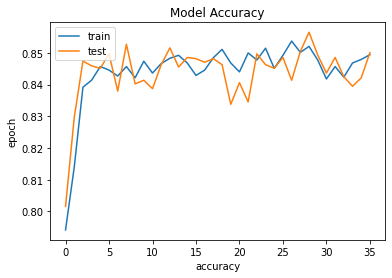

In [28]:
#Summarize the history of accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

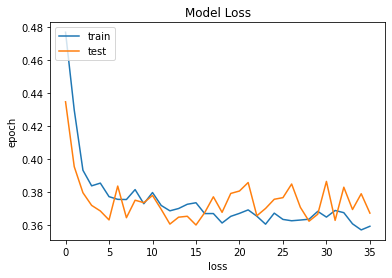

In [29]:
#Summarize the history of loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [30]:
#Making the prediction and evaluating the model
# predicted test results
y_pred = classifier.predict(X_test)
y_pred = (y_pred>=0.5)

63/63 [==============================] - 0s 1ms/step


In [31]:
# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1544,   51],
       [ 228,  177]])

In [32]:
#Calculate Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score

0.8605

In [33]:
#Get the weights
classifier.get_weights()

[array([[-0.918381  , -0.00750424,  0.9286597 , -0.85740906, -0.9213204 ,
          0.04878775,  0.10784353,  0.37282184,  0.39064306,  0.07826144,
          0.34261194],
        [ 0.00749965,  1.6418083 , -1.174298  , -0.6448326 , -0.8521655 ,
          2.2914307 , -2.3540075 , -0.3137215 , -0.8105357 ,  1.1320076 ,
          1.7155124 ],
        [ 0.28223553, -0.21882696,  0.7738885 , -0.0373856 , -0.68540496,
          0.08588427, -0.19765368,  0.67423195,  0.580644  , -0.663404  ,
         -1.0801737 ],
        [-1.190931  , -0.8503944 , -0.64642215, -1.0424597 ,  0.3238367 ,
         -0.03416901, -0.50062114, -0.56738496,  0.71525776,  2.0212107 ,
         -0.06774766],
        [-1.7119845 , -3.7411747 ,  0.7133979 ,  1.4998671 , -0.58858716,
         -0.15625918,  1.0031917 ,  2.9737544 , -0.535928  ,  3.2609413 ,
          0.02450946],
        [-0.38524467, -0.0411645 , -0.44312045, -0.12174752, -0.29320732,
         -0.0266197 , -0.05003402,  0.04030566, -0.69694465, -0.1004486

In [36]:
#Save the model as h5 file
classifier.save('ANN.h5')

In [37]:
#Load the model
from tensorflow.keras.models import load_model
output = load_model('ANN.h5')
out = output.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [41]:
#After loading the model the accuracy calculation
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score

0.8605